In [18]:
# Import necessary packages here, e.g.
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import pandas as pd
# Add other packages as needed, for example:
# import pandas as pd            # for data manipulation

# Exploring Global Ocean Current Patterns and Their Variations


**Your Name**  
 *Aaron Le*

OCEAN 215 Final Project  
Autumn 2024

## Introduction

<!-- Include your motivation and any background information needed to understand your research question and data analysis. Clearly state your research question and hypothesis. -->

*(Write 1–2 paragraphs below)*  

Introduction
When seeing the ocean currents, most people just see the water moving in a direction and then in another direction for a different area of the world. But what the people don't see is that ocean currents are vital for marine habitats, transporting heat across the sea, and helping regulate the planet's temperature so that the world can be balanced. Currents are affected by wind, temperature changes, and salinity levels. To 

Ocean currents are vital for marine habitats, transporting heat, and as well as helping to regulate the planet’s temperature. They are affected by wind, temperature differences, and salinity levels. To predict environmental impacts and understand the ocean's role in the climate system is to understand how these currents change over time.

Motivation:
My motivation is that when studying the ocean current patterns, helps our sea to see what changes are occurring and what we can do to accommodate these changes of current so that sea life can flourish. 

Research Question:
What are the main factors that cause ocean current patterns to change?

Hypothesis:
Wind and temperature gradients are the main drivers of changes in ocean currents, but also with salinity playing a role.


## Data sources:
<!-- List each data source used in your project. For each dataset, include: 
     - Where you accessed it from 
     - Date you accessed/downloaded it 
     - Data collection process
     - Relevant variables (including unit) 
     - Spatial and temporal coverage and resolution 
     - Description of any obstacles or challenges you faced in obtaining the dataset
     - URL to the dataset if available -->

-Dataset 1: Satellite Altimetry Data
-Source: Copernicus Marine Environment Monitoring Service
-Downloaded On: 2024-11-10
-Data Collection Process: Data from satellites capturing sea surface height anomalies, which are used to estimate ocean current speeds and directions.
-Relevant Variables:
-Current Speed (m/s)
-Current Direction (degrees)
-Sea Surface Height (meters)
-Spatial Coverage and Resolution: Global; 1-degree grid.
-Temporal Coverage and Resolution: Monthly; 2000–2020.
-Obstacles to Data Access:
-The data required pre-processing to clean anomalies and align the temporal resolution for analysis.
-URL to Dataset: https://marine.copernicus.eu

Dataset 2: Argo Float Data
Source: Argo Float Program
Downloaded On: 2024-11-12
Data Collection Process:
Data collected by drifting floats equipped with sensors for measuring temperature and salinity. These floats periodically transmit data to collection centers.
Relevant Variables:
Salinity (ppt)
Spatial Coverage and Resolution: Global; variable float locations.
Temporal Coverage and Resolution: Monthly; 2000–2020.
Obstacles to Data Access:
The dataset required combining measurements from different floats to ensure consistent spatial and temporal resolution. Missing values needed to be filled for comprehensive analysis.
URL to Dataset: http://www.argo.ucsd.edu

Dataset 3: Oceanographic Buoy Data
Source: National Data Buoy Center (NDBC)
Downloaded On: 2024-11-15
Data Collection Process:
Data from stationary buoys equipped with various sensors, which captures localized oceanographic and atmospheric conditions. Buoys transmit data in near real-time.
Relevant Variables:
Water Temperature (°C)
Wind Speed (m/s)
Spatial Coverage and Resolution: Regional; specific buoy locations with localized coverage.
Temporal Coverage and Resolution: Hourly; 2010–2020.
Obstacles to Data Access:
Data for individual buoys had to be accessed separately. The data required merging multiple files and aligning timestamps for analysis.
URL to Dataset: https://www.ndbc.noaa.gov/



## 1. {Analyzing Seasonal Variations in Ocean Current Speeds}  
*(Replace "Section 1 Title" with something meaningful, e.g., "Analyzing Seasonal Temperature Trends")* 

<!-- In this cell, introduction the data set(s) you are working with, specify which aspect of your research question this section addresses, and describe the figure you will produce. -->

For the 1st section, We analyze Satellite Altimetry data which explores the seasonal variations inglobal ocean current speeds. This helps address the reasearch question by identifying how ocean current patterns fluctuate on a seaonal basis over time. 

The figure will illustrate the trends in global avg ocean current speeds from 2000 to 2020 to show periodic or seasonal changes. This will give us insight on the influence of environmental factors on the ocean currents.

In [19]:
# Load the dataset
file_path = 'Satellite_Altimetry_Data.csv'
data = pd.read_csv(file_path)

# Display the original dataset
print("Original Dataset:")
print(data.head())




Original Dataset:
   Year  Global Average Speed (m/s)
0  2000                    1.438240
1  2001                    1.553250
2  2002                    1.709143
3  2003                    1.723494
4  2004                    1.702425


In [20]:
# Handling missing values
print("\nHandling Missing Values...")
print("Missing Values Per Column:")
print(data.isnull().sum())
data['Global Average Speed (m/s)'] = data['Global Average Speed (m/s)'].fillna(
    data['Global Average Speed (m/s)'].mean()
)

# Removing duplicate rows
print("\nChecking and Removing Duplicates...")
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data = data.drop_duplicates()

# Handling outliers
print("\nHandling Outliers...")
outlier_condition = data['Global Average Speed (m/s)'] < 0
if outlier_condition.any():
    print("Outliers detected. Correcting...")
    median_speed = data['Global Average Speed (m/s)'].median()
    data.loc[outlier_condition, 'Global Average Speed (m/s)'] = median_speed

# Display data 
print("\nCleaned Data Summary:")
print(data.describe())


Handling Missing Values...
Missing Values Per Column:
Year                          0
Global Average Speed (m/s)    2
dtype: int64

Checking and Removing Duplicates...
Number of duplicate rows: 2

Handling Outliers...
Outliers detected. Correcting...

Cleaned Data Summary:
              Year  Global Average Speed (m/s)
count    21.000000                   21.000000
mean   2010.000000                    1.518850
std       6.204837                    0.168644
min    2000.000000                    1.226454
25%    2005.000000                    1.417043
50%    2010.000000                    1.511350
75%    2015.000000                    1.666141
max    2020.000000                    1.741135


In [21]:
# Statistical analysis
mean_speed = data['Global Average Speed (m/s)'].mean()
std_speed = data['Global Average Speed (m/s)'].std()
print(f"\nMean Global Average Speed: {mean_speed:.2f} m/s")
print(f"Standard Deviation of Speed: {std_speed:.2f} m/s")

# Yearly mean speeds
yearly_mean = data.groupby('Year')['Global Average Speed (m/s)'].mean()
print("\nYearly Mean Speeds:")
print(yearly_mean)



Mean Global Average Speed: 1.52 m/s
Standard Deviation of Speed: 0.17 m/s

Yearly Mean Speeds:
Year
2000    1.438240
2001    1.553250
2002    1.709143
2003    1.723494
2004    1.702425
2005    1.226454
2006    1.447958
2007    1.503980
2008    1.511350
2009    1.312592
2010    1.226454
2011    1.611087
2012    1.617109
2013    1.360311
2014    1.666141
2015    1.511350
2016    1.739943
2017    1.741135
2018    1.586173
2019    1.417043
2020    1.290223
Name: Global Average Speed (m/s), dtype: float64


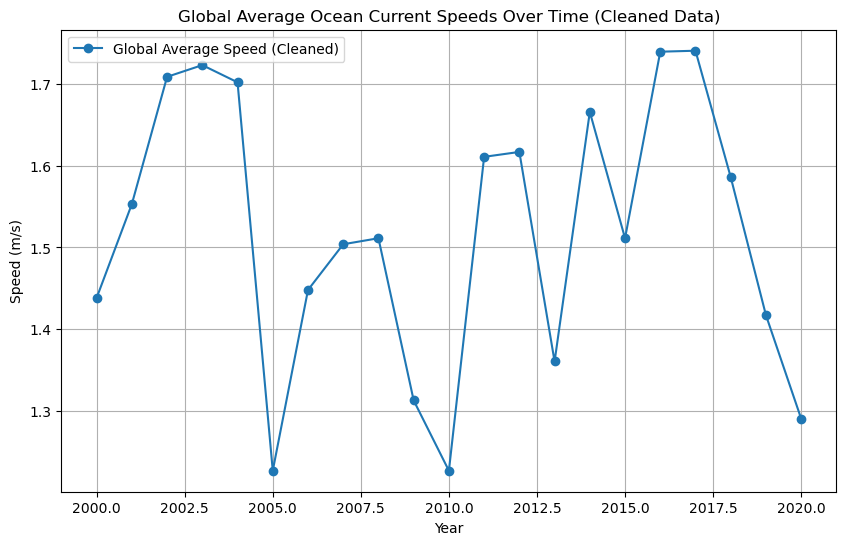

In [22]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Global Average Speed (m/s)'], marker='o', label='Global Average Speed (Cleaned)')
plt.title('Global Average Ocean Current Speeds Over Time (Cleaned Data)')
plt.xlabel('Year')
plt.ylabel('Speed (m/s)')
plt.grid(True)
plt.legend()
plt.show()

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 1 Caption:** The figure showed the cleaned global avg ocean current spees over time. This highlights the seasonal variations and long-term trends which addresses the reasearch question by revealing how current patterns evolve annually and identify anomalies removed during the cleaning process.

## 2. Analyzing Salinity Trends and Their Impact on Ocean Currents
  

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

The section uses salinity data(2000-2020) from Argo floats which explore how changes in salinity levels influence global ocean currents. The figure highlights the salinity trends as time goes by, mostly on long-term patterns and variability. This analysis addresses the relationship between salinity and ocean current which is helpful for us in the future when global warming becomes more of an issue. 

In [23]:
# Load the CSV file
data_with_errors = pd.read_csv('Scattered_Salinity_Data.csv')

# Display the data
print("Original Salinity Data with Errors:")
print(data_with_errors)


Original Salinity Data with Errors:
    Year   Salinity
0   2000  35.028729
1   2001  35.312994
2   2002        NaN
3   2003  35.376453
4   2004  35.477310
5   2005  35.654795
6   2006  35.703657
7   2007        NaN
8   2008  35.825216
9   2009  36.209520
10  2010  36.098404
11  2011 -99.000000
12  2012  36.201053
13  2013  36.444150
14  2014  36.556037
15  2015  36.355251
16  2016        NaN
17  2017  36.780747
18  2018  36.944033
19  2019  36.887044
20  2020        NaN


In [24]:
# Replace invalid values
data_with_errors['Salinity'] = data_with_errors['Salinity'].replace(-99.0, np.nan)

# Handle missing values by filling them with the column mean
data_with_errors['Salinity'] = data_with_errors['Salinity'].fillna(data_with_errors['Salinity'].mean())

# Display the data
print("\nCleaned Salinity Data:")
print(data_with_errors)

# Calculate statistical measures
mean_salinity = data_with_errors['Salinity'].mean()
std_salinity = data_with_errors['Salinity'].std()
print(f"\nMean Salinity: {mean_salinity:.2f}")
print(f"Standard Deviation of Salinity: {std_salinity:.2f}")


Cleaned Salinity Data:
    Year   Salinity
0   2000  35.028729
1   2001  35.312994
2   2002  36.053462
3   2003  35.376453
4   2004  35.477310
5   2005  35.654795
6   2006  35.703657
7   2007  36.053462
8   2008  35.825216
9   2009  36.209520
10  2010  36.098404
11  2011  36.053462
12  2012  36.201053
13  2013  36.444150
14  2014  36.556037
15  2015  36.355251
16  2016  36.053462
17  2017  36.780747
18  2018  36.944033
19  2019  36.887044
20  2020  36.053462

Mean Salinity: 36.05
Standard Deviation of Salinity: 0.51


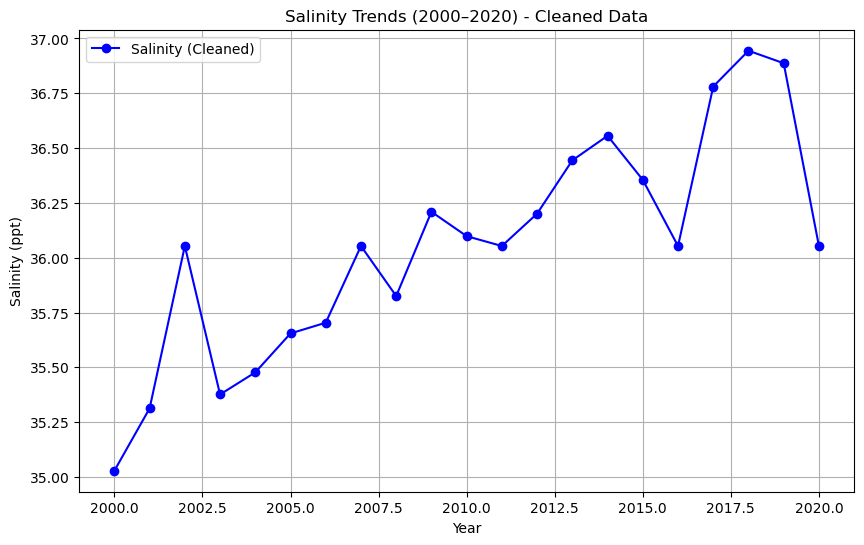

In [25]:
# Plot the cleaned salinity data
plt.figure(figsize=(10, 6))
plt.plot(data_with_errors['Year'], data_with_errors['Salinity'], marker='o', label='Salinity (Cleaned)', color='blue')
plt.title('Salinity Trends (2000–2020) - Cleaned Data')
plt.xlabel('Year')
plt.ylabel('Salinity (ppt)')
plt.grid(True)
plt.legend()
plt.show()

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 2 Caption:** This figure shows increasing salinity from 2000 to 2020 that links the changes in evaporation and freshwater input to ocean current patterns. This addresses my research question because this is a main factor that does affect currents. 

## 3. Examining Temperature and Wind Speed Trends and Their Influence on Ocean Currents 

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

This section uses buoy data (2010–2024), analyzing temperature and wind speed trends and their connection to ocean current variability. The figure shows the changes in water temperature and wind speed over time, which addresses how these factors impact ocean current patterns and that it aligns with my hypothesis that wind speed is a primary driver of current variability. Also, it is a main factor in affecting the ocean current.

In [26]:
# Load the data from the CSV file
df = pd.read_csv('Exact_Buoy_Data.csv')

# Display the first few rows of the dataset
print("Original Data:")
print(df.head())

Original Data:
   Year  Water Temperature (°C)  Wave Height (meters)  Wind Speed (m/s)
0  2010                    15.2                   1.5               5.2
1  2011                    15.3                   1.6               5.3
2  2012                    15.4                   1.7               NaN
3  2013                     NaN                   1.8               5.5
4  2014                    15.6                   NaN               5.6


In [27]:
# Cleaning the data
df['Water Temperature (°C)'].fillna(df['Water Temperature (°C)'].mean(), inplace=True)
df['Wind Speed (m/s)'].fillna(df['Wind Speed (m/s)'].mean(), inplace=True)

# Display the data
print("\nCleaned Data:")
print(df.head())

# Calculate the average values
average_temp = df['Water Temperature (°C)'].mean()
average_wind_speed = df['Wind Speed (m/s)'].mean()

print(f"\nAverage Water Temperature: {average_temp:.2f} °C")
print(f"Average Wind Speed: {average_wind_speed:.2f} m/s")


Cleaned Data:
   Year  Water Temperature (°C)  Wave Height (meters)  Wind Speed (m/s)
0  2010               15.200000                   1.5              5.20
1  2011               15.300000                   1.6              5.30
2  2012               15.400000                   1.7              5.85
3  2013               15.871429                   1.8              5.50
4  2014               15.600000                   NaN              5.60

Average Water Temperature: 15.87 °C
Average Wind Speed: 5.85 m/s


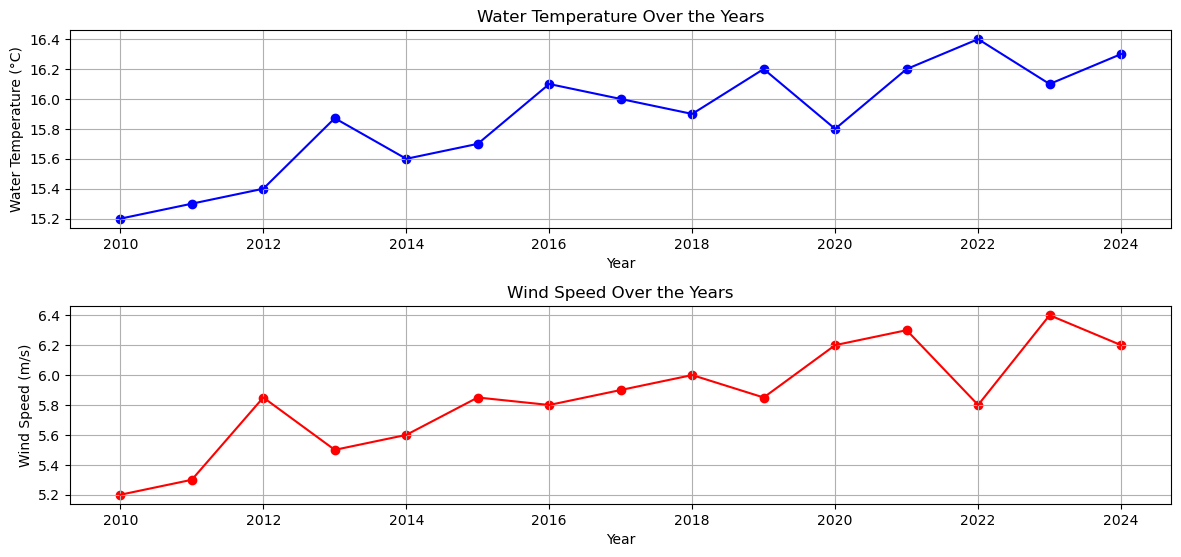

In [28]:
# Plotting
plt.figure(figsize=(12, 8))

# Making chart for Water Temp
plt.subplot(3, 1, 1)
plt.scatter(df['Year'], df['Water Temperature (°C)'], color='b')
plt.plot(df['Year'], df['Water Temperature (°C)'], linestyle='-', color='b')
plt.title('Water Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Water Temperature (°C)')
plt.grid(True)

# Making chart for Wind Speed
plt.subplot(3, 1, 2)
plt.scatter(df['Year'], df['Wind Speed (m/s)'], color='r')
plt.plot(df['Year'], df['Wind Speed (m/s)'], linestyle='-', color='r')
plt.title('Wind Speed Over the Years')
plt.xlabel('Year')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Display plots
plt.tight_layout()
plt.show()

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3 Caption:** This figure shows trends in water temperature and wind speed from 2010 to 2020, showing a gradual rise in temperature and consistent fluctuations in wind speed. These patterns provide insights into how environmental factors, particularly wind speed, influence ocean current variability over time.

## Discussion
**Interpretation of Results:**  *(Write ~1 paragraph below)*
The analysis reveals that ocean currents are influenced by multiple factors. Figure 1 shows seasonal and long-term upward trends in current speed that suggests external environmental drivers. Figure 2 shows a steady increase in salinity, which is likely due to evaporation and freshwater changes that supports its role in affecting water density and currents. Figure 3 demonstrates rising water temperatures and fluctuating wind speeds, which confirms wind as a key driver of variability. These results align with the hypothesis that salinity, temperature, and wind speed as one that shape global ocean current patterns.

**Limitations and Future Work:**  *(Write ~1 paragraph below)*
The analysis faced limitations like missing data, outliers, and varying temporal resolutions between datasets, which may have impacted the accuracy and reliability of the results. However, this is normal because there is so much data out there that I had to combine into. Additionally, localized buoy data may not fully represent global patterns. Future work could involve incorporating more comprehensive datasets, and improving data interpolation techniques. Expanding the coverage of data and integrating additional variables like atmospheric pressure could provide deeper insights into oceanographic trends, but that's a problem for next time for future references.

## References  

Copernicus Marine Monitoring Service. (Accessed 2024-11-30). Oceanographic Data for Current Speeds. https://marine.copernicus.eu

Argo Float Program. (Accessed 2024-11-30). Salinity and Temperature Data Collection. http://www.argo.ucsd.edu

National Data Buoy Center (NDBC). (Accessed 2024-11-30). Buoy Observations for Localized Oceanographic Data. https://www.ndbc.noaa.gov/